### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성 청년 SW아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

## **🔍 Objectives**

### **1. 실습 개요**
- 🌐 **웹 크롤링 실습**   
- 🔄 **CSV 데이터 처리 실습**  

---

### **2. 실습 진행 목적 및 배경**
- 본 실습에서는 **정적 페이지와 동적 페이지 웹 크롤링**을 실습하며, 다양한 라이브러리의 활용법을 배웁니다.  
- **JSON, CSV, XML**과 같은 다양한 데이터 포맷의 구조를 이해하고 이를 변환하거나 저장하는 방법을 학습합니다.  
- 학습자는 데이터를 수집, 처리, 저장하는 유연한 워크플로우를 체득하게 됩니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**
- 실시간 데이터를 **수집**하고 **분석**하는 기술 습득  
- 데이터를 다룰 때 **포맷 변환 및 저장 능력** 향상  
- **Selenium**, **BeautifulSoup** 등 웹 크롤링 라이브러리 활용 능력 향상  


---

### **4. 실습 핵심 내용**
- 💻 **동적 웹 크롤링 실습** (Selenium 활용)  


### **Prerequisites**

```
selenium>=4.0.0
webdriver-manager>=3.8.5
beautifulsoup4>=4.9.3
requests>=2.25.1
lxml>=4.6.2

```


# 웹 크롤링 실습

- HTML 구조 실습

In [ ]:
html_doc ='''<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href='https://sports.news.naver.com/wfootball/index' id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>
'''

with open('웹크롤링 연습.html','w') as f:
  f.write(html_doc)

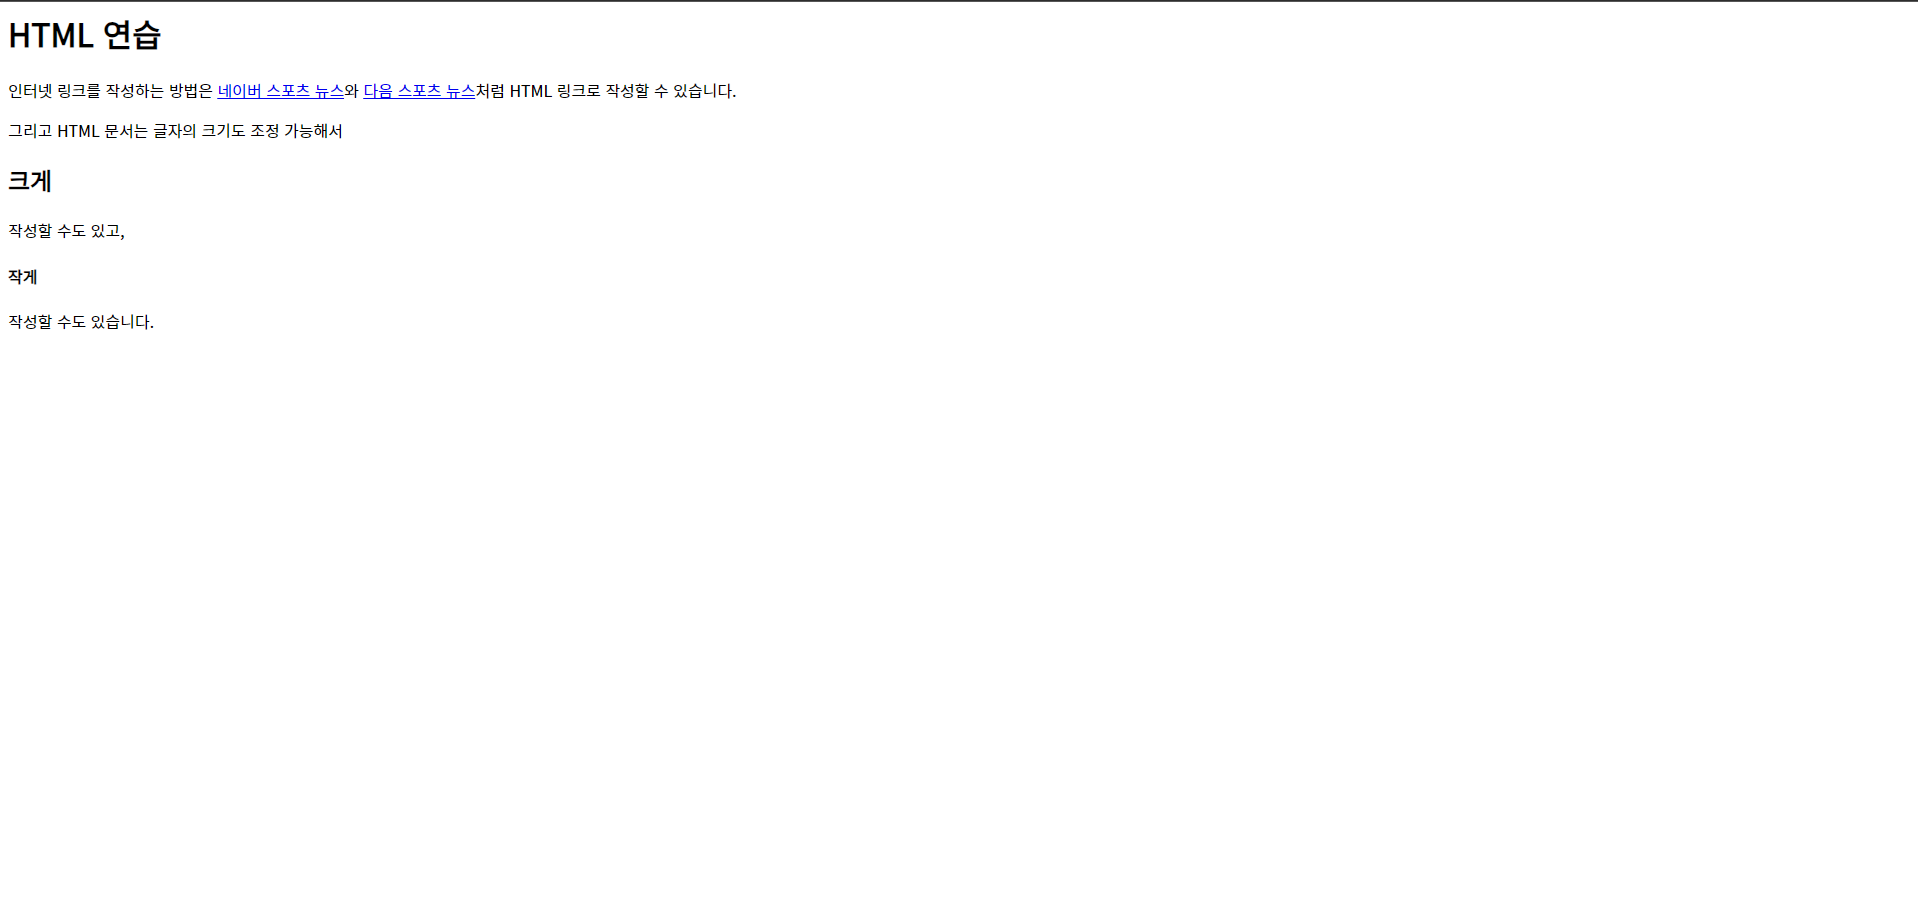

- 코드 작성 이후 실행하고 코랩 탐색기에서 '웹크롤링 연습.html'을 다운받아서 실행해보기
- 각 링크를 보며 어떤 구조로 연결이 되었는지 생각해보기
- HTML 태그에 따른 구조를 생각하며 보기

## 1. BeautifulSoup

### 1-1. bs4 설치

In [ ]:
# bs4를 import로 사용하기 위해 설치

!pip install bs4

HTML 구조 실습에서 작성해서 저장한 html 문서를 다시 불러들여 문서를 파싱하여 사람이 이해하기 쉬운 언어로 변환하고 필요한 정보를 추출하는 과정

### 1-2. 문서 파싱(parsing)

- 앞서 저장한 html 문서를 다시 읽어들여 html 태그의 형태를 그대로 유지하면서 파싱하는 방법인 BeautifulSoup 클래스를 사용하여 읽는다
- 이를 사람이 식별하기 좋게 태그 단위로 출력하는 prettify 메소드를 활용한다

In [ ]:
# bs4 모듈에서 BeautifulSoup 클래스를 import하고 bs라는 약칭으로 사용
from bs4 import BeautifulSoup as bs

# 이전에 생성한 HTML 파일 ('웹크롤링 연습.html')을 읽기 모드('r')로 열기
with open('웹크롤링 연습.html', 'r') as f:
    # HTML 파일의 내용을 읽어와서 변수 html_doc에 저장
    html_doc = f.read()

# BeautifulSoup 객체 생성 - html_doc을 'html.parser'를 사용하여 파싱
soup = bs(html_doc, 'html.parser')

# BeautifulSoup 객체 출력 (HTML 구조를 그대로 출력)
print(soup)

# prettify() 메서드를 사용해 HTML 문서를 들여쓰기 및 정리하여 출력
print(soup.prettify())


<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>

<html>
 <head>
  <title>
   웹크롤링 연습
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    <h1>
     HTML 연습
    </h1>
   </b>
  </p>
  <p class="link">
   인터넷 링크를 작성하는 방법은
   <a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">
    네이버 스포츠 뉴스
   </a>
   와
   <a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">
    다음 스포츠 뉴스
   </a>
   처럼
HTML 링크로 작성할 수 있습니다.
  </p>
  <p class="story">
   그리고 HTML 문서는 글자의 크기도 조정 가능해서
   <h2>
    크게
   </h2>
   작성할 수도 있고,
   <h4>
    작게
   </h4>
   작성할 수도 있습니다.


- prettify()를 사용해 출력시키면 태그의 시작과 종료 위치, 상위 및 하위 태그의 종속 관계를 이해하기 쉬워진다
-  여기서 저장한 soup 객체는 html 태그가 그대로 살아있어서 이 태그들의 특성을 이용해 필요한 정보를 추출할 수 있다

In [ ]:
# soup 객체에서 모든 <p> 태그를 찾은 후 반복문을 통해 텍스트만 출력
for p in soup.find_all('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)

# soup 객체에서 CSS 선택자 'p'를 사용하여 <p> 태그를 찾은 후 텍스트 출력
for p in soup.select('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)


HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



- 결과를 보면 soup 객체의 메소드인 title과 태그명들을 활용하여 필요한 부분만 정보를 추출할 수 있다
- find_all, select 함수를 이용하는 방법이 필요한 부분의 정보를 추출하는데 더 효율적이다

In [ ]:
# soup 객체에서 모든 <p> 태그를 찾아 텍스트를 출력
for p in soup.find_all('p'):
    # 각 <p> 태그 내부의 텍스트를 출력
    print(p.text)

# soup 객체에서 CSS 선택자 'p'를 사용하여 <p> 태그를 찾아 텍스트를 출력
for p in soup.select('p'):
    # 각 <p> 태그 내부의 텍스트를 출력
    print(p.text)


HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



### 1-3. find 함수 활용

- **find** 함수는 태그, 속성과 속성값을 활용해서 HTML 문서의 텍스트를 추출할 수 있다
- **find_all** 함수는 여러 개의 내용을 리스트 형태로 가져올 수 있으며, 특정 하나의 태그만을 추출하려면 find 함수를 사용한다
- 태그 내의 **class** 혹은 **id** 등에 해당하는 속성과 속성값을 활용하여 해당 태그의 내용을 추출할 수 있다

In [ ]:
# soup 객체에서 모든 <p> 태그를 찾아 리스트 형태로 출력
print(soup.find_all('p'))

# soup 객체에서 첫 번째 <p> 태그를 찾아 출력
print(soup.find('p'))

# soup 객체에서 클래스 이름이 'title'인 요소를 찾아 출력
print(soup.find(class_='title'))

# soup 객체에서 속성이 'class'이고 값이 'python'인 요소를 찾아 출력
print(soup.find(attrs={'class': 'python'}))

# soup 객체에서 태그가 'a'이고, 속성 'id'가 'link1'인 요소를 찾아 출력
print(soup.find('a', {'id': 'link1'}))

# soup 객체에서 속성이 'id'이고 값이 'link2'인 요소를 찾아 출력
print(soup.find(attrs={'id': 'link2'}))


[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- 기본적으로 태그 명을 사용하고, 여기에 클래스나 아이디 등의 속성과 그에 해당하는 속성값을 넣어 해당 태그의 텍스트를 추출할 수 있다
- 실제 값을 추출할 경우, find_all은 여러 개의 결과를 반환하므로, 각 결과를 처리하기 위해 for 문을 사용한다.
- find의 경우는 단일값을 가지고 있기 때문에 속성값을 추출할 때는 get 함수를 이용하고, 태그에 둘러싸여 있는 텍스트를 추출하고자 할 때는 text 메소드를 활용하면 된다

In [ ]:
# 첫 번째 <p> 태그 내부에서 <h1> 태그를 찾아 텍스트 출력
print(soup.find('p').find('h1').text)

# 첫 번째 <p> 태그의 'class' 속성 값을 가져와 출력
print(soup.find_all('p')[0].get('class'))

HTML 연습
['title']


### 1-4. CSS 선택자(Selector) 이용 : select 함수

- CSS(Cascading Style Sheets)에서 선택자는 디자인 스타일을 적용하고자 하는 HTML의 요소를 선택할 때 사용된다
- 다양한 종류가 있으며 여러 개의 선택자를 통해서 하나의 태그를 공통으로 제어할 수 있다


- 태그 선택자, 클래스 선택자, 아이디 선택자가 있다
- 우선 적용 순위로는 조금 더 구체적인 선택자가 우선순위로 적용된다
- find_all 함수와 같은 기능으로는 select 함수 (여러 개의 시리즈)
- find 함수와 같은 기능으로는 select_one 함수 (하나의 태그)

In [ ]:
# CSS 선택자 'p'를 사용하여 모든 <p> 태그를 리스트 형태로 출력
print(soup.select('p'))

# CSS 선택자 'p'를 사용하여 첫 번째 <p> 태그를 찾아 출력
print(soup.select_one('p'))

# 클래스 이름이 'title'인 요소를 찾아 출력 (CSS 선택자 사용)
print(soup.select_one('.title'))

# 클래스 이름이 'python'인 요소를 찾아 출력
print(soup.select_one('python'))

# 태그 'a'와 id='link1' 속성을 가진 요소를 찾아 출력 (CSS 선택자 사용)
print(soup.select_one('a#link1'))

# id='link2' 속성을 가진 요소를 찾아 출력
print(soup.select_one('#link2'))


[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- find 함수와 다른 부분은 문법상 **'class', 'id'** 태그를 **'.'**과 **'#'**으로 대체하여 사용하며, 기능은 동일하다

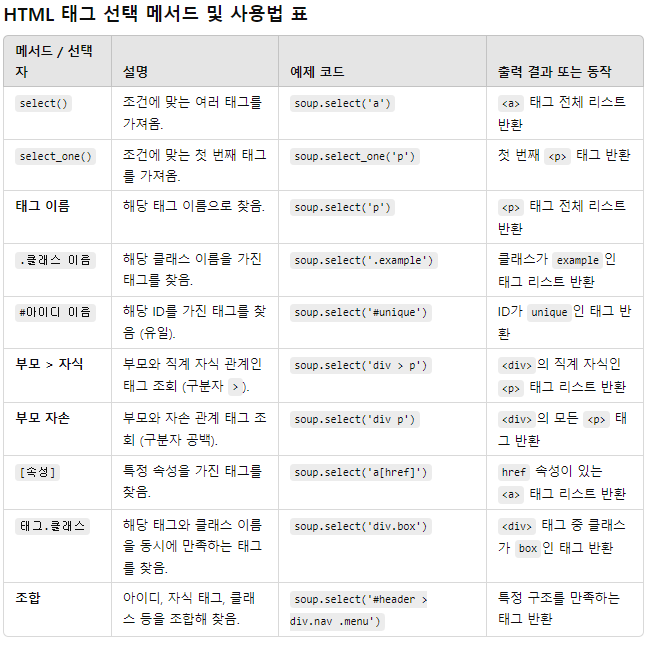

출처 : https://pythonblog.co.kr/coding/11/#google_vignette/

In [ ]:
# 첫 번째 <p> 태그 내부에 있는 id='link1' 요소의 텍스트 출력
print(soup.select_one('p > #link1').text)

# 두 번째 <a> 태그의 'id' 속성 값을 가져와 출력
print(soup.select('a')[1].get('id'))

# 두 번째 <p> 태그의 텍스트 내용을 출력
print(soup.select('p')[1].text)


네이버 스포츠 뉴스
link2
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.



## 2. Requests, Urllib

### 2-1. robots.txt로 확인

- 네이버 뉴스의 크롤링 가능 여부 : https://news.naver.com/robots.txt


In [ ]:
import requests

# 로봇 배제 기준 확인 (robots.txt 파일 가져오기)
resp = requests.get("https://news.naver.com/robots.txt")
print(resp.text)


User-agent: Yeti
Allow: /main/imagemontage
Disallow: /

User-Agent: facebookexternalhit
Disallow: /*/template

User-Agent: Twitterbot
Disallow: /*/template

User-agent: *
Disallow: /



- 3가지의 User-Agent 제외하고 모든 부분에 대해 허용

### 2-2. Requests

- 데이터 전송시 딕셔너리 형태로 주고 받기에 별도로 디코딩 과정이 필요 없음
- get 메소드로 해당 웹 페이지 정보 읽기 가능
- 수신한 HTML 문서에 대한 encoding이나 headers 정보를 간단하게 파악 가능
- 모든 텍스트 정보를 확인하기 위해 간단하게 text 메서드 활용

In [ ]:
import requests

# 웹 페이지에 GET 요청을 보냄
r = requests.get('https://news.naver.com/')

# 인코딩 방식 출력
print("Encoding:", r.encoding)

# 헤더에서 'Expires' 정보 출력
print("Expires:", r.headers.get('Expires'))

# 헤더에서 'Content-Type' 정보 출력
print("Content-Type:", r.headers.get('Content-Type'))

# 전체 헤더 정보 출력
print("\nHeaders:")
print(r.headers)


Encoding: utf-8
Expires: None
Content-Type: text/html;charset=utf-8

Headers:
{'Cache-Control': 'no-cache, no-store', 'x-xss-protection': '1; mode=block', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'Content-Language': 'ko-KR', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'accept, content-type', 'Access-Control-Allow-Methods': 'GET, POST', 'Content-Length': '40776', 'Content-Type': 'text/html;charset=utf-8', 'referrer-policy': 'unsafe-url', 'Server': 'nfront', 'Date': 'Fri, 29 Nov 2024 17:47:16 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding'}


- 본인의 개인 블로그에 접근하는 방법
- 아이디와 패스워드 입력

- requests + bs4의 select 활용

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청
response = requests.get('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# HTML 파싱
html_doc = response.text
soup = bs(html_doc, 'html.parser')

# 특정 div 태그 선택
content = soup.select_one('div.post-body')

# 텍스트 추출 (중복 제거)
text_set = set()  # 중복 제거를 위해 set 사용
if content:
    for para in content.select("span"):
        text_set.add(para.text.strip())  # 중복 제거

# 정렬 및 줄바꿈 추가
text = "\n".join(sorted(text_set))

# 최종 텍스트 출력
print(text)



!
"class"
"p"
'''<p class='para'>빅데이터 분석과 활용</p>'''
'html.parser'
1. HTML 구조의 이해
2.HTML 문서의 사례와 텍스트 추출
3. 웹크롤링 방법 사례
<html><head><title>웹크롤링 연습</title></head><body><p class="title"><b><h1>HTML 연습</h1></b></p><p class="link">인터넷 링크를 작성하는 방법은<a class="blog" href='https://ai-bigdataanalysis.blogspot.com/' id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼HTML 링크로 작성할 수 있습니다.</p><p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.</p></body></html>위에 있는 소스코드로 작성된 HTML 파일을 웹브라우저로 열면 아래와 같은 형태의 웹페이지로 출력됨을 알 수 있다. 특히 여기서 인공지능 기반 덱스트 데이터 분석 블로그와 인공지능 기반 빅데이터 자연어 처리와 통계 분석의 경우는 a 태그에서 href 속성을 이용한 링크로 연결되어 다른 웹페이지로 이동할 수 있다.
HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명

### 2-3. urllib

- requests 라이브러리와 다르게 데이터 전송시 바이너리 데이터로 변환하여 주고 받기에 HTML 문서를 수신했을 때 디코딩 과정이 필요하다
- 한글은 UTF-8, EUC-KR, cp949 형태가 존재
- HTML 문서의 Head 부분에서 관련된 정보를 찾아 적절한 포맷에 맞게 디코딩을 해야한다


In [ ]:
# urllib.request 모듈에서 urlopen 함수를 import
from urllib.request import urlopen

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com' 페이지에 접근하여 응답 객체를 html 변수에 저장
html = urlopen('https://ai-bigdataanalysis.blogspot.com')

# 응답된 페이지의 인코딩 방식 확인
# 서버에서 응답한 HTTP 헤더에서 'Content-Type'의 charset 값을 가져와 인코딩 방식을 출력
print("Encoding:", html.headers.get_content_charset())

# HTML 내용을 읽어와서 디코딩 (기본적으로 UTF-8로 인코딩된 경우)
# 서버로부터 받은 데이터를 바이너리 형식으로 읽어온 후, 문자열로 디코딩하여 저장
html_doc = html.read().decode()

# 디코딩된 HTML 문서의 처음 200자를 출력
# HTML 소스의 일부를 출력하여 페이지 구조를 확인
print(html_doc[:200])


Encoding: utf-8
<!DOCTYPE html>
<html class='v2' dir='ltr' lang='ko'>
<head>
<link href='https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css' rel='stylesheet' type='text/css'/>
<meta content='width


- UTF-8이 아닌 EUC-KR이나 cp949일경우 decode('cp949')로 변경
- urllib과 bs4의 find 문 활용한 웹 크롤링 방식

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청 및 응답 객체 가져오기
response = urlopen('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# HTML 소스를 디코딩
html_doc = response.read().decode()

# BeautifulSoup 객체 생성 및 HTML 파싱
soup = bs(html_doc, 'html.parser')

# 클래스가 'post-body entry-content'인 div 태그를 선택
content = soup.find("div", {"class": "post-body entry-content"})

# 중복을 방지하기 위해 set 사용
text_set = set()

# 찾은 div 태그 내부에서 모든 <span> 태그의 텍스트를 추출
if content:
    for para in content.find_all("span"):
        # 텍스트를 set에 추가하여 중복 제거
        text_set.add(para.text.strip())

# 중복 제거된 텍스트를 하나의 문자열로 합침
final_text = "\n".join(sorted(text_set))

# 결과 출력
print(final_text)



!
"class"
"p"
'''<p class='para'>빅데이터 분석과 활용</p>'''
'html.parser'
1. HTML 구조의 이해
2.HTML 문서의 사례와 텍스트 추출
3. 웹크롤링 방법 사례
<html><head><title>웹크롤링 연습</title></head><body><p class="title"><b><h1>HTML 연습</h1></b></p><p class="link">인터넷 링크를 작성하는 방법은<a class="blog" href='https://ai-bigdataanalysis.blogspot.com/' id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼HTML 링크로 작성할 수 있습니다.</p><p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.</p></body></html>위에 있는 소스코드로 작성된 HTML 파일을 웹브라우저로 열면 아래와 같은 형태의 웹페이지로 출력됨을 알 수 있다. 특히 여기서 인공지능 기반 덱스트 데이터 분석 블로그와 인공지능 기반 빅데이터 자연어 처리와 통계 분석의 경우는 a 태그에서 href 속성을 이용한 링크로 연결되어 다른 웹페이지로 이동할 수 있다.
HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명

## 3. Selenium

### 3-1. selenium 라이브러리 설치

- 웹 브라우저에 필요한 드라이버 사전 설치가 필요하다
- 반드시 웹 브라우저의 종류와 version 정보가 일치해야 한다


- Chrome 버전과 ChromeDriver 버전 호환
  - 크롬 버전과 드라이버 버전이 일치하지 않으면 Selenium이 제대로 작동하지 않습니다.
  - 로컬 환경에서는 설치된 Google Chrome의 정확한 버전을 확인한 후, 해당 버전에 맞는 ChromeDriver를 다운로드해야 합니다.
- 레퍼런스
  - https://github.com/SergeyPirogov/webdriver_manager
  - https://developer.chrome.com/docs/chromedriver/downloads?hl=ko
  - https://www.selenium.dev/documentation/webdriver/
  

In [ ]:
# 1. Google Chrome 및 ChromeDriver 설치
!apt-get update -qq  # 패키지 목록 업데이트 (출력 최소화)
!apt-get install -qqy wget unzip  # wget과 unzip 패키지 설치
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb  # 최신 Google Chrome 다운로드
!dpkg -i google-chrome-stable_current_amd64.deb  # Chrome 설치
!apt --fix-broken install -y  # 설치 중 발생하는 문제 해결
!pip install webdriver-manager #webdriver-manager 설치
!pip install selenium #selenium 설치

# Chrome 및 ChromeDriver 버전 확인
!google-chrome --version  # 설치된 Chrome 버전 출력

# ChromeDriver 다운로드 및 설치
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# webdriver-manager를 사용해 최신 ChromeDriver 설치
driver_path = ChromeDriverManager().install()
print(f"ChromeDriver installed at: {driver_path}")  # ChromeDriver 설치 경로 출력

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package google-chrome-stable.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.85-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Package libvulkan1 is not installed.

dpkg: error processing package google-chrome-stable (--install):
 dependency problems - leaving unconfigured
Processing triggers for man-db (2.10.2-1) ...
Errors were encountered while processing:
 google-chrome-stable
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Correcting dependencies... Done
The following additional packages will be ins

### 3-2. Selenium을 활용한 웹 크롤링
- 코랩 환경에서는 웹 브라우저에 대한 핸들링이 직접적으로 불가능하다
- 아래와 같은 옵션들을 크롬 웹 드라이버에 적용시켜야 한다

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# Chrome 옵션 설정
options = Options()
options.add_argument("--headless")  # GUI 없이 실행
options.add_argument("--no-sandbox")  # 보안 모드 비활성화
options.add_argument("--disable-dev-shm-usage")  # 메모리 공유 문제 방지
options.add_argument("window-size=1920,1080")  # 창 크기 설정

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 테스트용 코드 (구글 접속)
driver.get("https://www.google.com")
print("페이지 제목:", driver.title)

driver.quit()


페이지 제목: Google


- BBC 사이트에서 인기 뉴스 링크 웹 크롤링한 사례

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

# Chrome 옵션 설정 (브라우저 창 없이 백그라운드에서 실행)
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # GUI 없이 실행
options.add_argument("--no-sandbox")  # 샌드박스 모드 비활성화 (Linux 권한 문제 방지)
options.add_argument("--disable-dev-shm-usage")  # /dev/shm 사용 비활성화 (메모리 문제 방지)
options.add_argument("window-size=1920,1080")  # 창 크기 설정 (전체 화면으로 설정)

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# BBC 인기 뉴스 페이지 접속
url = "https://www.bbc.com/korean/popular/read"
driver.get(url)  # 지정된 URL로 이동
time.sleep(3)  # 페이지 로딩 대기

# 인기 뉴스 목록에서 기사 링크 크롤링
articles = []  # 기사 링크를 저장할 리스트
for i in range(1, 11):  # 1부터 10까지의 기사 목록을 순회
    try:
        # 특정 기사 항목의 링크를 찾기 위해 CSS Selector 사용
        element = driver.find_element(By.CSS_SELECTOR, f"#main-wrapper > div > main > div > div > div > div > ol > li:nth-child({i}) > div > div.bbc-14zb6im > a")
        link = element.get_attribute("href")  # 링크 추출
        articles.append(link)  # 리스트에 링크 추가
        print(f"Article {i}: {link}")  # 링크 출력
    except Exception as e:
        print(f"Error accessing article {i}: {e}")  # 에러 발생 시 출력

# 크롤링한 기사 링크 출력
for article in articles:
    print(article)

# 브라우저 종료
driver.quit()


Article 1: https://www.bbc.com/korean/articles/c4gm78wk8evo
Article 2: https://www.bbc.com/korean/articles/cd9nz24x188o
Article 3: https://www.bbc.com/korean/articles/ckgdvy5x3lzo
Article 4: https://www.bbc.com/korean/articles/c80lp2z9gpmo
Article 5: https://www.bbc.com/korean/articles/c3e8lpyxndpo
Article 6: https://www.bbc.com/korean/articles/cr5mgmqegy3o
Article 7: https://www.bbc.com/korean/news-52694660
Article 8: https://www.bbc.com/korean/articles/cn7md402zk8o
Article 9: https://www.bbc.com/korean/articles/cv2y9gj7qxgo
Article 10: https://www.bbc.com/korean/articles/cwygwwgnd80o
https://www.bbc.com/korean/articles/c4gm78wk8evo
https://www.bbc.com/korean/articles/cd9nz24x188o
https://www.bbc.com/korean/articles/ckgdvy5x3lzo
https://www.bbc.com/korean/articles/c80lp2z9gpmo
https://www.bbc.com/korean/articles/c3e8lpyxndpo
https://www.bbc.com/korean/articles/cr5mgmqegy3o
https://www.bbc.com/korean/news-52694660
https://www.bbc.com/korean/articles/cn7md402zk8o
https://www.bbc.com/kor

- BBC 기사 본문 및 관련 토픽 크롤링

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

# Chrome 옵션 설정 (브라우저 창 없이 실행)
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("window-size=1920,1080")

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 크롤링할 기사 링크 목록 (수동 입력)
article_links = [
    "https://www.bbc.com/korean/articles/c8rl0n8yrmlo",
    "https://www.bbc.com/korean/articles/c80lp2z9gpmo",
    "https://www.bbc.com/korean/articles/cq8vdnw2w22o",
    "https://www.bbc.com/korean/articles/cn7md402zk8o",
    "https://www.bbc.com/korean/articles/c3vk59q96z5o",
    "https://www.bbc.com/korean/articles/c5y59jgrwxwo",
    "https://www.bbc.com/korean/articles/cwy9k9zz807o",
    "https://www.bbc.com/korean/articles/c4gz5nyv4e2o",
    "https://www.bbc.com/korean/articles/cn8gemm2ep7o",
    "https://www.bbc.com/korean/articles/crk407xy2rdo"
]

# 각 기사 페이지에서 본문 크롤링
for link in article_links:
    driver.get(link)  # 기사 페이지로 이동
    time.sleep(3)  # 페이지 로딩 대기

    try:
        # 기사 본문 내용 가져오기 (CSS Selector 사용)
        paragraphs = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] p")
        content = "\n".join([p.text for p in paragraphs])  # 본문을 문자열로 합침

        # 기사 내용 출력
        print(f"URL: {link}")
        print(f"기사 내용:\n{content}\n")
        print("=" * 80)  # 구분선 출력
    except Exception as e:
        print(f"Error accessing article {link}: {e}")  # 에러 발생 시 출력

# 브라우저 종료
driver.quit()


URL: https://www.bbc.com/korean/articles/c8rl0n8yrmlo
기사 내용:
사진 출처,
뉴스1
오는 15일 이재명 더불어민주당 대표의 공직선거법 위반(허위사실공표) 혐의 사건 1심 선고를 앞두고 관심이 쏠린다. 차기 대권주자로 꼽히는 제1야당 대표가 유죄를 받아들 경우 대권가도에 큰 변화가 예상되기 때문이다.
10일 정치권과 법조계 등에 따르면 서울중앙지법 형사합의34는 오는 15일 공직선거법 위반 혐의로 재판에 넘겨진 이 대표의 1심 선고를 진행한다.
이번 결과는 이 대표와 관련해 진행 중인 4건의 재판 중 가장 먼저 나오는 판결이다. 검찰이 2022년 9월 이 대표를 기소한 지 약 2년 2개월 만의 일이다.
이 대표는 지난 20대 대선 과정 중 방송사 인터뷰와 국정감사 등에서 대통령에 당선될 목적으로 대장동·백현동 개발사업 관련 의혹에 대해 허위 사실 등을 공표한 혐의를 받는다.
이 개발사업은 이 대표의 성남시장시절 성남시에서 추진된 대규모 부동산 개발 프로젝트로, 개발 과정에서 특혜와 비리 의혹이 불거지며 큰 논란이 됐다.
지난 2021년 12월 대선후보 인터뷰에서 이 대표가 고 김문기 성남도시개발공사 개발사업 1처장에 대해 한 말이 문제가 됐다. 김 씨는 전날 스스로 목숨을 끊었다.
김 씨를 알았냐는 질문에 이 대표는 "시장할 때는 이 사람의 존재를 몰랐다"고 답했다. 당시 직원이 워낙 많아 하위직인 김 전 처장을 기억하지 못했다는 것.
하지만, 이 대표가 유동규 전 성남도시개발공사 본부장, 김 전 처장과 함께 해외여행을 가 함께 골프 라운딩을 하고 김 전 처장에게서 여러 차례 직접 보고를 받은 정황 등이 알려졌다.
검찰은 대장동 비리에 연루된 사실을 감추기 위해 김 전 처장과의 관계를 부인했다고 보고 있다.
이번 선거법 위반 재판의 핵심 쟁점은 발언의 고의성 여부다.
법정은 '김문기를 모른다'는 이 대표 말이 사실 발언인지 의견 표출인지를 겨루고 있다. 법적 처벌 대상이 되는 건 의견이 아니라 '사실에 관해 거짓을 유

## 4. csv화

### 4-1. csv로 만들어 기사 본문, 관련 토픽으로 구성

- 크롤링을 하는 모든 과정을 실습
- robots.txt로 검사
-BBC 인기 뉴스 페이지에서 상위 10개의 기사 링크 자동 크롤링
-각 기사 링크로 이동하여 본문 및 기사 제목을 가져와 CSV 파일로 저장


In [ ]:
!pip install pandas
#판다스 설치

In [ ]:
import time
import csv
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from IPython.display import display
from webdriver_manager.chrome import ChromeDriverManager

# Chrome 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("window-size=1920,1080")

# ChromeDriver 자동 설치 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# BBC 뉴스 사이트의 robots.txt 파일 URL
robots_url = "https://www.bbc.com/robots.txt"

# 크롤링 허용 여부 확인 함수 (생략 가능)
def is_crawling_allowed(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            if "Disallow: /korean/" in response.text:
                print("크롤링이 허용되지 않습니다.")
                return False
            return True
    except Exception as e:
        print(f"robots.txt 확인 중 오류 발생: {e}")
    return False

# 크롤링 시작
if not is_crawling_allowed(robots_url):
    print("크롤링을 종료합니다.")
else:
    print("크롤링을 시작합니다.")

    # BBC 인기 뉴스 페이지에서 기사 링크 크롤링
    url = "https://www.bbc.com/korean/popular/read"
    driver.get(url)
    time.sleep(3)

    # 인기 뉴스 링크 가져오기
    article_links = []
    try:
        for i in range(1, 11):  # 상위 10개의 인기 뉴스만 가져오기
            element = driver.find_element(By.CSS_SELECTOR, f"#main-wrapper > div > main > div > div > div > div > ol > li:nth-child({i}) > div > div.bbc-14zb6im > a")
            link = element.get_attribute("href")
            article_links.append(link)
            print(f"기사 링크 {i}: {link}")
    except Exception as e:
        print(f"기사 링크 크롤링 중 오류 발생: {e}")

    # CSV 파일 생성 및 헤더 작성
    csv_filename = "bbc_뉴스_기사.csv"
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(["URL", "기사 제목", "소제목", "본문 내용"])

    # 각 기사 페이지에서 기사 제목 및 본문 크롤링
    for link in article_links:
        driver.get(link)
        time.sleep(3)

        try:
            # 기사 제목 가져오기
            title_element = driver.find_element(By.CSS_SELECTOR, "h1")
            title = title_element.text

            # 기사 본문에서 h2와 p 태그 가져오기
            h2_elements = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] h2")
            p_elements = driver.find_elements(By.CSS_SELECTOR, "main[role='main'] p")

            # 소제목과 본문 내용을 ' '으로 연결
            subtitles = ' '.join([h2.text for h2 in h2_elements if h2.text])
            content = ' '.join([p.text for p in p_elements if p.text])

            # CSV 파일에 데이터 추가
            with open(csv_filename, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file, delimiter=';')
                writer.writerow([link, title, subtitles, content])

            print(f"저장된 기사: {title} - {link}")

        except Exception as e:
            print(f"기사 접근 중 오류 발생: {link}, 오류: {e}")

    # 브라우저 종료
    driver.quit()

    print(f"\n크롤링 완료. '{csv_filename}' 파일에 저장되었습니다.")

    # CSV 파일 읽기 및 표시
    try:
        df_loaded = pd.read_csv(csv_filename, delimiter=';', encoding='utf-8')
        print("\nCSV 파일 데이터 로드 및 표시:")
        display(df_loaded)  # 전체 데이터 표시

        # 특정 키워드로 필터링
        keyword = "한국"
        filtered_df = df_loaded[df_loaded["본문 내용"].str.contains(keyword, case=False, na=False)]
        print(f"\n'{keyword}' 키워드가 포함된 기사들:")
        display(filtered_df)  # 필터링된 데이터 표시

    except Exception as e:
        print(f"CSV 파일 읽기 중 오류 발생: {e}")


크롤링을 시작합니다.
기사 링크 1: https://www.bbc.com/korean/articles/c4gm78wk8evo
기사 링크 2: https://www.bbc.com/korean/articles/cd9nz24x188o
기사 링크 3: https://www.bbc.com/korean/articles/ckgdvy5x3lzo
기사 링크 4: https://www.bbc.com/korean/articles/c80lp2z9gpmo
기사 링크 5: https://www.bbc.com/korean/articles/c3e8lpyxndpo
기사 링크 6: https://www.bbc.com/korean/articles/cn7md402zk8o
기사 링크 7: https://www.bbc.com/korean/articles/cr5mgmqegy3o
기사 링크 8: https://www.bbc.com/korean/articles/cly0mmkkrn2o
기사 링크 9: https://www.bbc.com/korean/news-52694660
기사 링크 10: https://www.bbc.com/korean/articles/c3vk59q96z5o
저장된 기사: 동덕여대 사태로 본 '여대'의 의미 - https://www.bbc.com/korean/articles/c4gm78wk8evo
저장된 기사: '이런 지옥인지 몰랐어요'...폐쇄병동에서 무슨 일 일어나나 - https://www.bbc.com/korean/articles/cd9nz24x188o
저장된 기사: K팝 그룹 뉴진스, '사내 따돌림' 논란 속 소속사에 결별 통보 - https://www.bbc.com/korean/articles/ckgdvy5x3lzo
저장된 기사: 트럼프가 공식적으로 대통령이 되는 시점은? - https://www.bbc.com/korean/articles/c80lp2z9gpmo
저장된 기사: 하얗게 물든 서울...117년만에 최대 폭설 - https://www.bbc.com/korean/art

,URL,기사 제목,소제목,본문 내용
0,https://www.bbc.com/korean/articles/c4gm78wk8evo,동덕여대 사태로 본 '여대'의 의미,"젠더 갈등·폭력 시위 논란도 '여대의 존재, 여전히 중요한 사회적 필요성' '내가 ...","사진 출처,\nNEWS1 “소멸할지언정 개방하지 않는다.” 동덕여대 재학생들이 이러..."
1,https://www.bbc.com/korean/articles/cd9nz24x188o,'이런 지옥인지 몰랐어요'...폐쇄병동에서 무슨 일 일어나나,"격리·강박의 위험성 반복되는 사망사고, '폐쇄성' 문제 지적도 격리·강박이 '유일한...","사진 출처,\n유족 제공 CCTV “제 딸은 고립된 채로 죽어갔어요. 다이어트 약 ..."
2,https://www.bbc.com/korean/articles/ckgdvy5x3lzo,"K팝 그룹 뉴진스, '사내 따돌림' 논란 속 소속사에 결별 통보",NaN,"사진 출처,\nREUTERS 최정상 K팝 5인조 여성그룹 ‘뉴진스’가 지난 28일(..."
3,https://www.bbc.com/korean/articles/c80lp2z9gpmo,트럼프가 공식적으로 대통령이 되는 시점은?,선거 결과 확정 시점은? 이제 트럼프는 대통령인가? 선거일과 취임식 사이 예정된 절...,"사진 출처,\nGETTY IMAGES 도널드 트럼프 공화당 대선 후보가 이번 대선에..."
4,https://www.bbc.com/korean/articles/c3e8lpyxndpo,하얗게 물든 서울...117년만에 최대 폭설,역대급 폭설에 사고 잇따라 기록적 폭설 이유,"사진 출처,\nEPA-EFE/REX/SHUTTERSTOCK 27일 서울에 16㎝가 ..."
5,https://www.bbc.com/korean/articles/cn7md402zk8o,트럼프가 공언한 7가지 대선 공약,1) 불법 이민자 추방 2) 경제·세금·관세 관련 움직임 3) 1월 6일 폭동범 일...,"사진 출처,\nGETTY IMAGES 도널드 트럼프가 이민자·경제·우크라이나 전쟁 ..."
6,https://www.bbc.com/korean/articles/cr5mgmqegy3o,"한국 스타 배우의 '혼외자 논쟁', 전국적인 논쟁을 불러일으키다",NaN,"사진 출처,\nGETTY IMAGES 한국에서 최근 유명 배우가 결혼한 관계가 아닌..."
7,https://www.bbc.com/korean/articles/cly0mmkkrn2o,"러시아 탈영병, 핵기지 경비와 극비 사항 공개",NaN,"사진 출처,\nRUSSIAN DEFENCE MINISTRY 2022년 2월 러시아가..."
8,https://www.bbc.com/korean/news-52694660,코비 브라이언트: 'NBA 스타' 코비 브라이언트의 사망 원인이 발표됐다,NaN,"사진 출처,\nREUTERS 지난 1월 캘리포니아에서 헬기 추락사고로 숨진 NBA ..."
9,https://www.bbc.com/korean/articles/c3vk59q96z5o,'딥페이크 성범죄 방지법' 국회 통과...앞으로 달라지는 것들은?,딥페이크 성범죄물 시청만 해도 처벌 일부 '아쉽다'는 평가도 앞으로 남은 과제는?,"사진 출처,\nNEWS1 딥페이크를 이용한 성범죄를 막고 피해자를 보호하기 위한 이..."


,URL,기사 제목,소제목,본문 내용
0,https://www.bbc.com/korean/articles/c4gm78wk8evo,동덕여대 사태로 본 '여대'의 의미,"젠더 갈등·폭력 시위 논란도 '여대의 존재, 여전히 중요한 사회적 필요성' '내가 ...","사진 출처,\nNEWS1 “소멸할지언정 개방하지 않는다.” 동덕여대 재학생들이 이러..."
1,https://www.bbc.com/korean/articles/cd9nz24x188o,'이런 지옥인지 몰랐어요'...폐쇄병동에서 무슨 일 일어나나,"격리·강박의 위험성 반복되는 사망사고, '폐쇄성' 문제 지적도 격리·강박이 '유일한...","사진 출처,\n유족 제공 CCTV “제 딸은 고립된 채로 죽어갔어요. 다이어트 약 ..."
4,https://www.bbc.com/korean/articles/c3e8lpyxndpo,하얗게 물든 서울...117년만에 최대 폭설,역대급 폭설에 사고 잇따라 기록적 폭설 이유,"사진 출처,\nEPA-EFE/REX/SHUTTERSTOCK 27일 서울에 16㎝가 ..."
6,https://www.bbc.com/korean/articles/cr5mgmqegy3o,"한국 스타 배우의 '혼외자 논쟁', 전국적인 논쟁을 불러일으키다",NaN,"사진 출처,\nGETTY IMAGES 한국에서 최근 유명 배우가 결혼한 관계가 아닌..."
9,https://www.bbc.com/korean/articles/c3vk59q96z5o,'딥페이크 성범죄 방지법' 국회 통과...앞으로 달라지는 것들은?,딥페이크 성범죄물 시청만 해도 처벌 일부 '아쉽다'는 평가도 앞으로 남은 과제는?,"사진 출처,\nNEWS1 딥페이크를 이용한 성범죄를 막고 피해자를 보호하기 위한 이..."
